<a href="https://colab.research.google.com/github/ev1025/CP1/blob/main/Code_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인스타카트 데이터 분석 (CRISP-DM 기반)

참고자료 : 케글 인스타카트 장바구니 분석 데이터     
https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis

## 1) 비즈니스이해

## 2) 데이터 이해

## 3) 데이터 전처리

### 전처리

In [ ]:
%pip install mlxtend --upgrade

In [ ]:
# 한글 그래프 폰트(런타임재시작, plt.rc('font', family='NanumBarunGothic'))
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from functools import reduce

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/인스타카트/aisles.csv')               # 소분류
df2 = pd.read_csv('/content/drive/MyDrive/인스타카트/departments.csv')          # 대분류
df3 = pd.read_csv('/content/drive/MyDrive/인스타카트/order_products__train.csv')
df4 = pd.read_csv('/content/drive/MyDrive/인스타카트/orders.csv')
df5 = pd.read_csv('/content/drive/MyDrive/인스타카트/products.csv')

In [ ]:
df3.shape

(1384617, 4)

In [ ]:
df1.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [ ]:
df2.isnull().sum()

department_id    0
department       0
dtype: int64

In [ ]:
df3.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
df4.isnull().sum()# 현재 주문 이전 주문과의 텀(데이터 유지)

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [ ]:
df5.isnull().sum() 

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [ ]:
# 한 번에 merge 각 컬럼이 달라서 실패
# data = [df3,df1,df2,df5,df6]
# full_data = reduce(lambda x,y : pd.merge(x,y), data)

In [ ]:
# 데이터 합치는 함수
def df_merge(t1,t2,t3,t4,t5):
    data = pd.merge(t1,t2)
    data = pd.merge(data,t3)
    data = pd.merge(data,t4)
    data = pd.merge(data,t5)
    return data

In [ ]:
full_data = df_merge(df3,df4,df5,df1,df2)
full_data

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,47901,train,14,4,6,16.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,2993,train,15,0,7,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,41425,train,4,3,8,14.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,187205,train,5,4,14,30.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3283540,39484,23,1,103639,train,7,0,20,6.0,Sliced Turkey Feast in Gravy Cat Food,41,8,cat food care,pets
1384613,3339757,24892,1,1,157916,train,4,2,6,22.0,Wild Mackerel & Whitefish Cat Food,41,8,cat food care,pets
1384614,3343813,24892,9,0,43638,train,10,2,15,22.0,Wild Mackerel & Whitefish Cat Food,41,8,cat food care,pets
1384615,3343813,27290,10,0,43638,train,10,2,15,22.0,Purrfect Delicacies Wet Cat Food Flaked Oceanf...,41,8,cat food care,pets


In [ ]:
# 그래프분석에 사용할 데이터 만들기
df_graph = full_data[['order_id', 'user_id','product_name','aisle','department','order_number','reordered','order_dow','days_since_prior_order','order_hour_of_day']]

In [ ]:
# 컬럼명 변경
def df_rename(data):
    data.columns = ['주문번호','유저','제품','소분류','대분류','누적주문','재주문','요일','주문텀','주문시간']
    return data

In [ ]:
df_graph = df_rename(df_graph)
df_graph = df_graph.sort_values(by='주문번호',ignore_index=True)

In [ ]:
df_graph

,주문번호,유저,제품,소분류,대분류,누적주문,재주문,요일,주문텀,주문시간
0,1,112108,Bulgarian Yogurt,yogurt,dairy eggs,4,1,4,9.0,10
1,1,112108,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,4,1,4,9.0,10
2,1,112108,Organic Celery Hearts,fresh vegetables,produce,4,0,4,9.0,10
3,1,112108,Organic Whole String Cheese,packaged cheese,dairy eggs,4,1,4,9.0,10
4,1,112108,Organic Hass Avocado,fresh fruits,produce,4,0,4,9.0,10
...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,169679,Organic Half & Half,cream,dairy eggs,30,1,0,4.0,10
1384613,3421063,169679,Natural Artesian Water,water seltzer sparkling water,beverages,30,1,0,4.0,10
1384614,3421070,139822,Creamy Peanut Butter,spreads,pantry,15,1,6,8.0,10
1384615,3421070,139822,Organic Unsweetened Almond Milk,soy lactosefree,dairy eggs,15,1,6,8.0,10


In [ ]:
# CSV로 저장
# df_graph.to_csv('file.csv',index=False)

### 분석

#### 이용시간 분석

In [ ]:
plt.rc('font', size= 15, family='NanumBarunGothic')
plt.rc('font',size=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=20)
y_name = [0,1,2,3,4,5,6]
labels = ['일요일','월요일','화요일','수요일','목요일','금요일','토요일']

In [ ]:
df_days = df_graph.groupby('요일')['유저'].count()
df_days = df_days.to_frame()
df_days.reset_index(inplace=True)
df_days

,요일,유저
0,0,324026
1,1,205978
2,2,160562
3,3,154381
4,4,155481
5,5,176910
6,6,207279


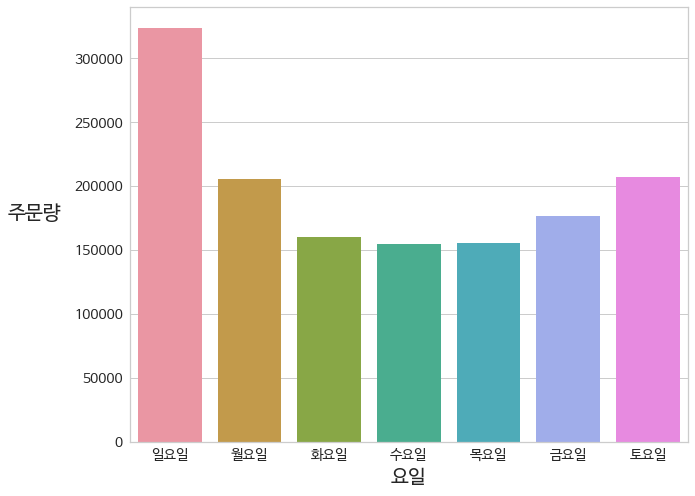

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data = df_days, x=df_days['요일'],y= df_days['유저'])
plt.ylabel('주문량', rotation='horizontal',labelpad=40)
plt.xticks(range(7),labels)
plt.show();

**주문요일별 이용시간**

In [ ]:
df_time = df_graph.groupby('요일')['주문시간'].value_counts()
heat_time = df_time.unstack()/1000

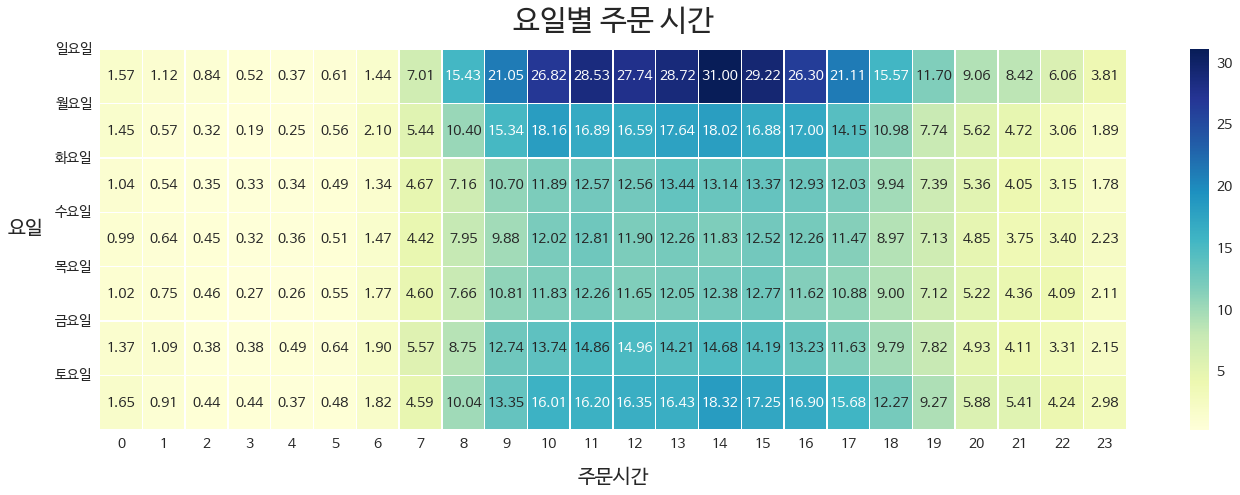

In [ ]:
plt.figure(figsize=(23,7))

sns.heatmap(heat_time, annot=True, linewidths=0.5, fmt = '.2f', cmap='YlGnBu')
plt.yticks(y_name, labels, rotation='horizontal')
plt.ylabel('요일',rotation='horizontal', labelpad=30, fontsize=20)
plt.xlabel('주문시간', labelpad=15, fontsize=20)
plt.title('요일별 주문 시간',pad=20)

plt.show();

In [ ]:
# # 피벗 테이블 예시
# weekhour_ds = full_data.pivot_table(index='order_dow', columns='order_hour_of_day', values='user_id', aggfunc=lambda x: len(x)/1000).fillna(0)

# plt.figure(figsize=(20,10))
# sns.heatmap(weekhour_ds, annot=True, linewidths=0.5, fmt = '.2f', cmap='YlGnBu')

#### 대분류 분석

In [ ]:
# 대분류 순위
df_graph['대분류'].value_counts(normalize=True)

produce            0.295451
dairy eggs         0.156759
snacks             0.085845
beverages          0.082366
frozen             0.072530
pantry             0.058675
bakery             0.034951
canned goods       0.033799
deli               0.031988
dry goods pasta    0.027959
household          0.025990
meat seafood       0.021888
breakfast          0.021306
personal care      0.015578
babies             0.010791
international      0.008596
missing            0.005959
alcohol            0.004043
pets               0.003248
other              0.001296
bulk               0.000981
Name: 대분류, dtype: float64

In [ ]:
# 대분류 그래프 데이터
count_depart = df_graph['대분류'].value_counts()
count_depart = count_depart.to_frame()
count_depart.reset_index(inplace=True)
count_depart.columns = ['대분류','개수']

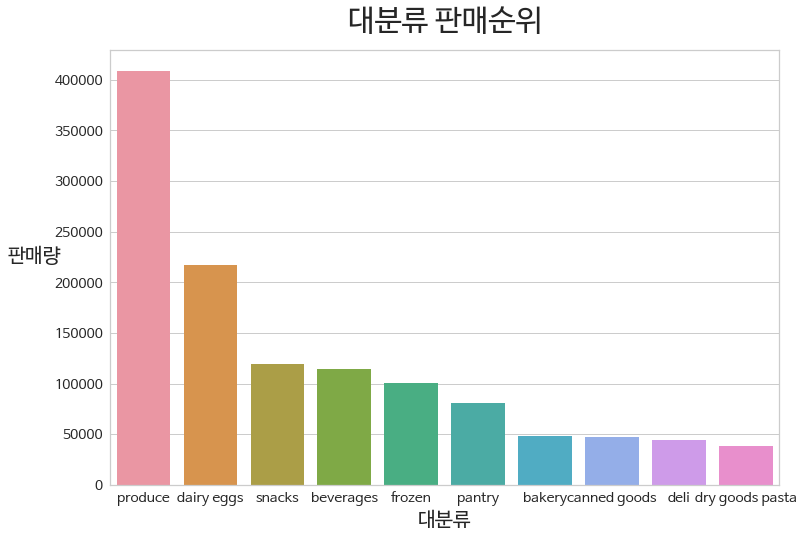

In [ ]:
# 대분류 그래프
plt.figure(figsize =(12,8))
sns.barplot(data=count_depart[:10],x='대분류',y='개수')
plt.ylabel('판매량', rotation='horizontal', labelpad=20)
plt.title('대분류 판매순위',pad = 20)
plt.show();

In [ ]:
df_day_depart = df_graph.groupby('요일')['대분류'].value_counts(ascending=False)
df_day_depart = df_day_depart.unstack()/1000

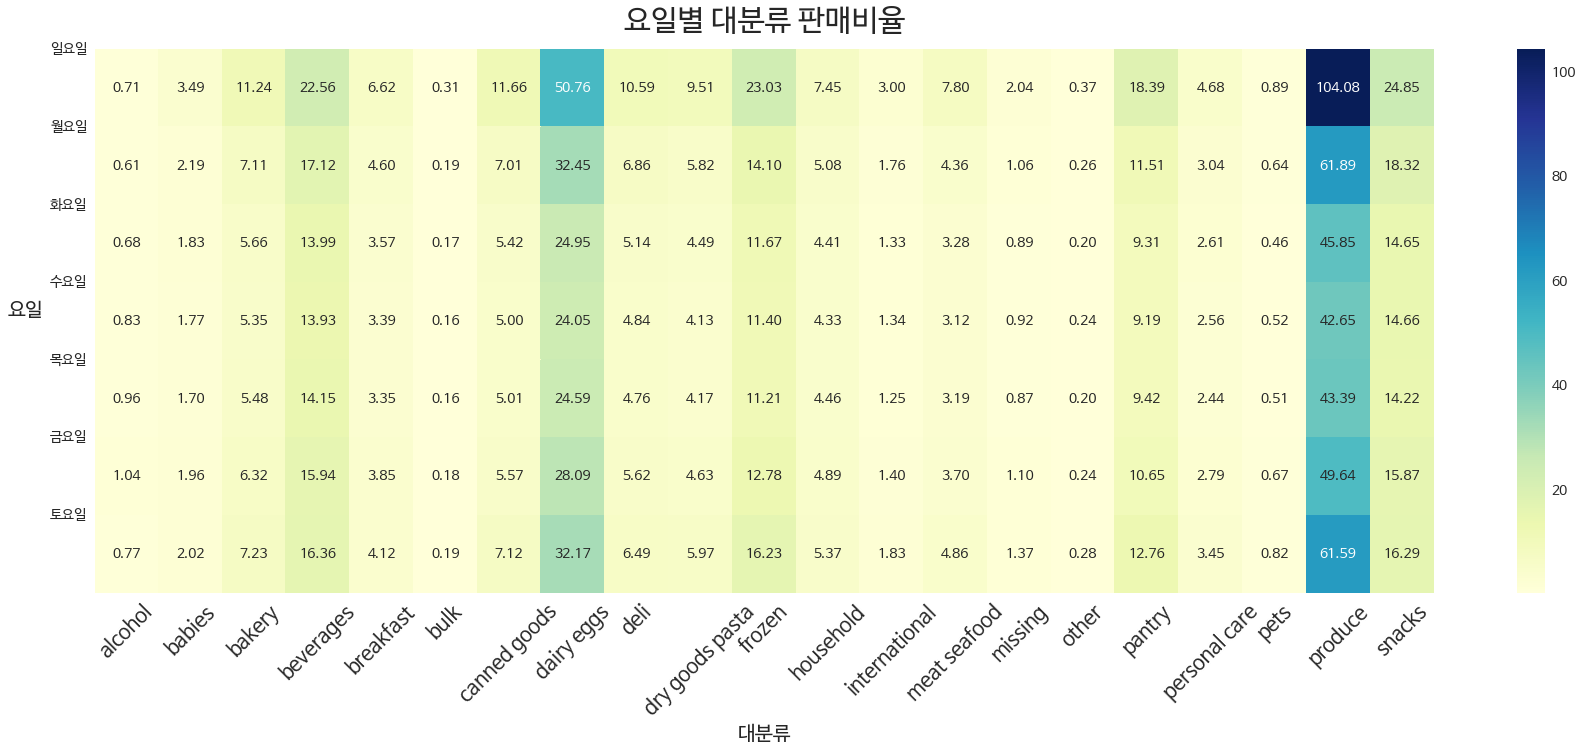

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df_day_depart, annot=True,fmt='.2f',cmap = 'YlGnBu')
plt.yticks(y_name, labels, rotation='horizontal')
plt.ylabel('요일', rotation='horizontal', labelpad=25)
plt.xticks(rotation =45,fontsize=20)
plt.title('요일별 대분류 판매비율',pad = 20)
# b,t = plt.ylim()
# plt.ylim(b+0.5,t-0.5)
plt.show()

In [ ]:
# # 대분류별 주문시간
# for i in set(df_graph['대분류']):
#     print(f'----------------{i}제품------------------------')
#     print(df_graph[df_graph['대분류']==i]['주문시간'].value_counts().to_frame().rank(ascending=False)[:5])

In [ ]:
# # 요일별 판매 순위
# day_depart = df_graph.groupby('요일')['대분류'].value_counts()
# day_depart = day_depart.to_frame()
# day_depart.columns=['개수']
# # day_depart.unstack() # 멀티인덱스  Series -> Dataframe

# for i in range(7):
#     print(f'---------{i}요일------------')
#     print(day_depart.loc[i])

In [ ]:
# # 대분류별 제품 순위 -> 대분류별 제품의 특징 찾기
# for i in set(df_graph['대분류']):
#     print('-------------------------------------------------')
#     print(f'----------------{i}제품--------------------')
#     print(df_graph[df_graph['대분류']==i]['제품'].value_counts().to_frame())

In [ ]:
# # 대분류별 요일 판매량 추이 비교
# for i in set(df_graph['대분류']):
#     pets_data = df_graph[df_graph['대분류']==i]
#     print(f'-----------{i}---------------')
#     print(pets_data.groupby('요일')['유저'].count().sort_values(ascending=False))

In [ ]:
# 대분류별 제품 판매요일 순위
# 3, 4, 5요일에 알콜을 많이 판매
for i in set(df_graph['대분류']):
    print(f'----------------{i}제품------------------------')
    print(df_graph[df_graph['대분류']==i]['요일'].value_counts().to_frame().rank(ascending=False))

----------------bulk제품------------------------
    요일
0  1.0
6  2.0
1  3.0
5  4.0
2  5.0
3  6.0
4  7.0
----------------missing제품------------------------
    요일
0  1.0
6  2.0
5  3.0
1  4.0
3  5.0
2  6.0
4  7.0
----------------meat seafood제품------------------------
    요일
0  1.0
6  2.0
1  3.0
5  4.0
2  5.0
4  6.0
3  7.0
----------------dairy eggs제품------------------------
    요일
0  1.0
1  2.0
6  3.0
5  4.0
2  5.0
4  6.0
3  7.0
----------------pets제품------------------------
    요일
0  1.0
6  2.0
5  3.0
1  4.0
3  5.0
4  6.0
2  7.0
----------------dry goods pasta제품------------------------
    요일
0  1.0
6  2.0
1  3.0
5  4.0
2  5.0
4  6.0
3  7.0
----------------deli제품------------------------
    요일
0  1.0
1  2.0
6  3.0
5  4.0
2  5.0
3  6.0
4  7.0
----------------produce제품------------------------
    요일
0  1.0
1  2.0
6  3.0
5  4.0
2  5.0
4  6.0
3  7.0
----------------household제품------------------------
    요일
0  1.0
6  2.0
1  3.0
5  4.0
4  5.0
2  6.0
3  7.0
----------------snacks제품-------------

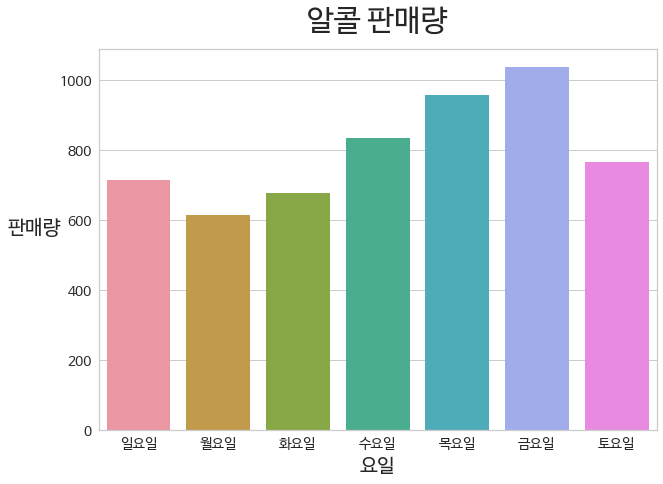

In [ ]:
al_data = df_graph[df_graph['대분류']=='alcohol'].groupby('요일')['유저'].count().to_frame().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data =al_data, x='요일', y='유저' )
plt.ylabel('판매량', rotation='horizontal', labelpad = 25)
plt.xticks(range(7),labels)
plt.title('알콜 판매량',pad=20)
plt.show()

#### 소분류별 분석

In [ ]:
# 소분류의 비율
# 채소와 과일류의 종류가 많음
df_graph['소분류'].value_counts(normalize=True)

fresh vegetables              0.108773
fresh fruits                  0.108675
packaged vegetables fruits    0.056689
yogurt                        0.039896
packaged cheese               0.030116
                                ...   
kitchen supplies              0.000324
baby bath body care           0.000237
baby accessories              0.000221
frozen juice                  0.000212
beauty                        0.000207
Name: 소분류, Length: 134, dtype: float64

In [ ]:
# 요일별 많이 팔리는 소분류(top10) - 식료품..
day_aisles = df_graph.groupby('요일')['소분류'].value_counts()
day_aisles = day_aisles.to_frame()
day_aisles.columns = ['개수']

for i in range(7):
    print(f'{i}')
    print(day_aisles.loc[i][:10])
    print('------------------------------------')

0
                                  개수
소분류                                 
fresh vegetables               39998
fresh fruits                   37086
packaged vegetables fruits     20244
yogurt                         13398
packaged cheese                 9953
milk                            7330
water seltzer sparkling water   7258
chips pretzels                  6521
soy lactosefree                 6072
frozen produce                  5548
------------------------------------
1
                                  개수
소분류                                 
fresh fruits                   23013
fresh vegetables               22579
packaged vegetables fruits     11949
yogurt                          8684
packaged cheese                 6194
water seltzer sparkling water   5816
milk                            4959
chips pretzels                  4650
soy lactosefree                 3891
bread                           3519
------------------------------------
2
                                

In [ ]:
# beers coolers 가 5,4,3요일에 많이 팔림 => 대분류 확인내용
for i in set(df_graph['소분류']):
    if df_graph[df_graph['소분류']==i]['요일'].value_counts().index[0] != [0]:
        print(f'------------소분류 : {i}----------')
        print(df_graph[df_graph['소분류']==i]['요일'].value_counts())

------------소분류 : cold flu allergy----------
1    227
0    216
6    202
2    198
3    182
5    175
4    146
Name: 요일, dtype: int64
------------소분류 : red wines----------
5    209
3    201
4    192
6    165
0    165
2    160
1    151
Name: 요일, dtype: int64
------------소분류 : spirits----------
5    179
4    159
6    152
0    143
3    126
1    105
2    103
Name: 요일, dtype: int64
------------소분류 : first aid----------
6    95
0    93
2    77
1    75
3    69
4    66
5    64
Name: 요일, dtype: int64
------------소분류 : beers coolers----------
5    380
4    372
3    271
2    243
1    204
0    190
6    179
Name: 요일, dtype: int64
------------소분류 : kosher foods----------
1    118
0    104
3     92
4     84
6     82
5     77
2     71
Name: 요일, dtype: int64
------------소분류 : trail mix snack mix----------
1    275
0    219
3    216
4    207
2    206
5    191
6    149
Name: 요일, dtype: int64
------------소분류 : specialty wines champagnes----------
6    83
4    80
5    77
3    77
0    53
2    51
1    40
Name: 

#### 제품별 분석

In [ ]:
# 가장 잘팔리는 top10
product_count = df_graph['제품'].value_counts()
top_10 = product_count[:10].to_frame().reset_index()
top_10.rename(columns={'index':'제품명'},inplace=True)
top_10

# 같은데 다른 방법
# df_top10 = df_graph.groupby('제품').count()[['유저']].sort_values(by='유저',ascending=False)[:10].reset_index()
# df_top10

,제품명,제품
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135
5,Organic Avocado,7409
6,Organic Hass Avocado,7293
7,Strawberries,6494
8,Limes,6033
9,Organic Raspberries,5546


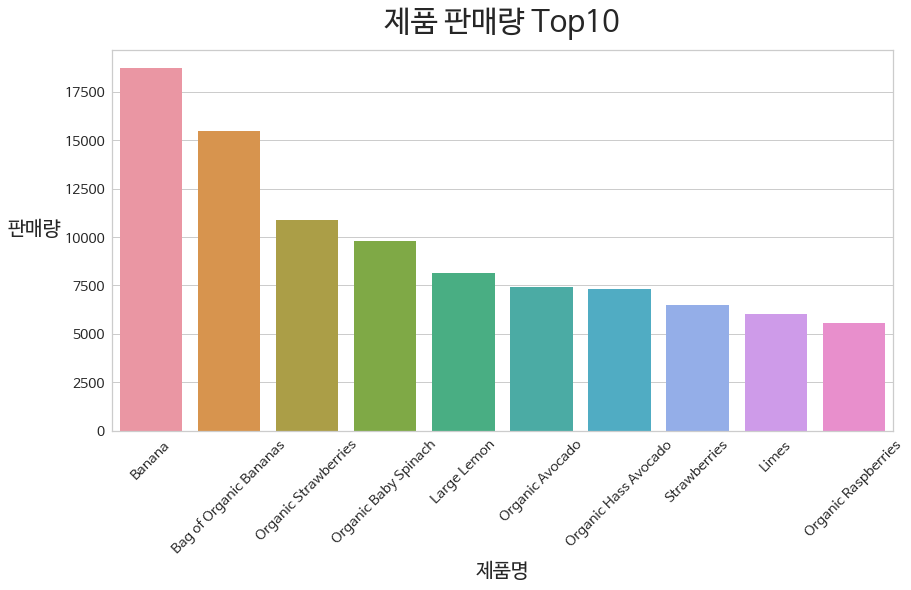

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(data = top_10, x='제품명',y='제품')
plt.xticks(rotation=45)
plt.ylabel('판매량', rotation='horizontal',labelpad=30)
plt.title('제품 판매량 Top10', pad = 20)
plt.show()

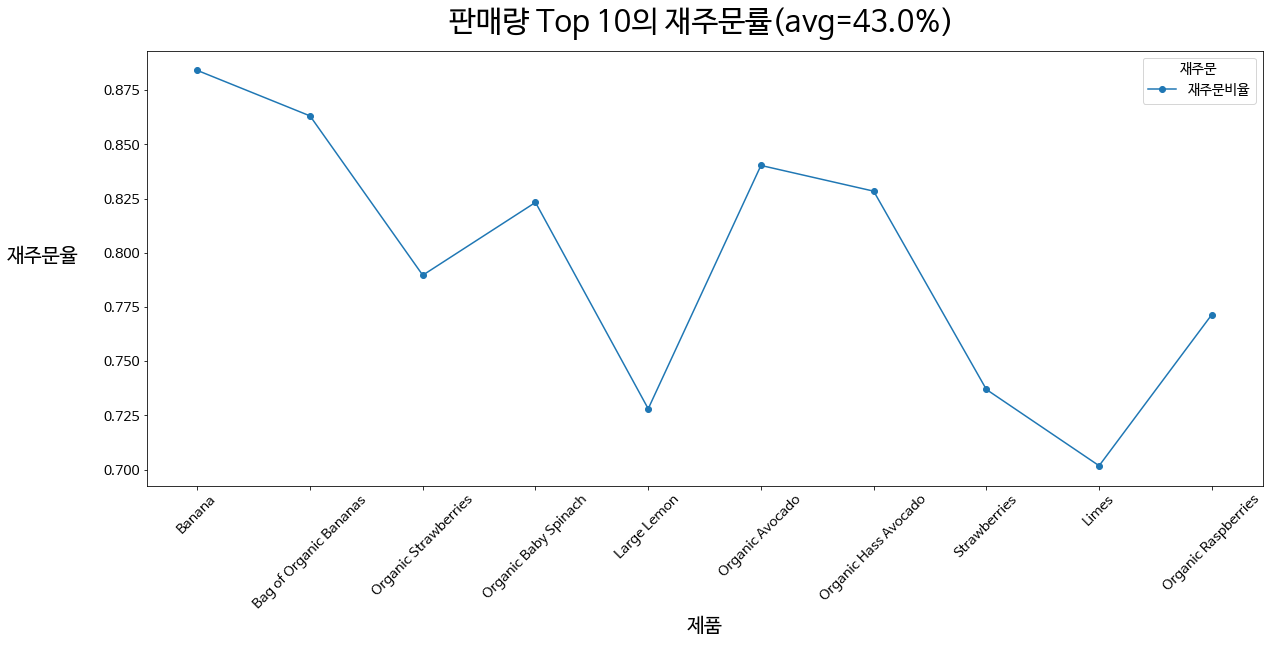

In [ ]:
# 판매량이 높은 제품이 재주문률도 높을까?

df_reorder = df_graph.groupby(['제품','재주문']).count()[['유저']] # df_reorder = df_graph.groupby(['제품','재주문']).agg({'유저':len})
df_reorder = df_reorder.reset_index().pivot(index='제품', columns='재주문', values='유저').fillna(0)
df_reorder['재주문비율'] = df_reorder[1] / df_reorder.sum(axis=1) # axis=1은 0, 1 더하기
df_reorder.sort_values(by='재주문비율',inplace=True)

df_reorder.loc[list(top_10['제품명'])][['재주문비율']].plot(kind='line',figsize=(20,8),marker='o')
plt.xticks(range(len(top_10)),list(top_10['제품명']),fontsize = 14,rotation=45)
plt.ylabel('재주문율',rotation='horizontal',labelpad=60)
plt.title(f"판매량 Top 10의 재주문률(avg={round(np.mean(df_reorder['재주문비율']),2)*100}%) ",pad = 20)
plt.show()

## 4) 모델링

### 연관규칙분석(Association Rule)

In [ ]:
# 주문번호 별 주문 리스트 나누기(한 번 주문 할 때 어떤 물건을 같이 사는지 확인하기 위해서)

# 연관규칙분석을 위해 요소 비교를 하는 과정에서 시간이 오래걸려서 리스트 대신 array를 사용하였다.
# 하나의 iterator 요소간 비교에서 zip 함수를 사용 할 수 있었다.
# 마지막 열은 record에 append 되지 않는 점을 확인하여 if문을 하나 더 추가하여 마지막 열 추가

df_array = df_graph.values # 전체 데이터를 array화 하여 계산속도 증가

record = [] # 주문번호 별 주문내역리스트
record2 =[] # 한 주문에 포함 된 내역

for p1, p2 in zip(df_array, df_array[1:]): # 0과1 1과2 ... 비교하도록 for문 

    if p1[0]==p2[0]:              # 주문번호가 같으면 record2에 추가
        record2.append(p1[2])

        if p1[2]==df_array[-2][2]: # 전체데이터의 마지막열에 도달하면 마지막 주문내역 record에 추가
            record2.append(p2[2])
            record.append(record2)
  
    else:
        record2.append(p1[2])    # 주문번호가 다르면 해당 주문의 마지막 물건이다. 주문번호 마지막 목록을 record2에 추가하고
        record.append(record2)   # 해당 주문을 그룹화한 record2를 record에 추가하고
        record2 = []             # record2를 초기화

In [ ]:
# 같은 주문번호끼리 list
record[0]

['Bulgarian Yogurt',
 'Lightly Smoked Sardines in Olive Oil',
 'Organic Celery Hearts',
 'Organic Whole String Cheese',
 'Organic Hass Avocado',
 'Bag of Organic Bananas',
 'Organic 4% Milk Fat Whole Milk Cottage Cheese',
 'Cucumber Kirby']

In [ ]:
# 위에 record 확인용
df_graph.head(10)

,주문번호,유저,제품,소분류,대분류,누적주문,재주문,요일,주문텀,주문시간
0,1,112108,Bulgarian Yogurt,yogurt,dairy eggs,4,1,4,9.0,10
1,1,112108,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,4,1,4,9.0,10
2,1,112108,Organic Celery Hearts,fresh vegetables,produce,4,0,4,9.0,10
3,1,112108,Organic Whole String Cheese,packaged cheese,dairy eggs,4,1,4,9.0,10
4,1,112108,Organic Hass Avocado,fresh fruits,produce,4,0,4,9.0,10
5,1,112108,Bag of Organic Bananas,fresh fruits,produce,4,0,4,9.0,10
6,1,112108,Organic 4% Milk Fat Whole Milk Cottage Cheese,other creams cheeses,dairy eggs,4,1,4,9.0,10
7,1,112108,Cucumber Kirby,fresh vegetables,produce,4,0,4,9.0,10
8,36,79431,Asparagus,fresh vegetables,produce,23,1,6,30.0,18
9,36,79431,Grated Pecorino Romano Cheese,specialty cheeses,dairy eggs,23,0,6,30.0,18


**surpport (지지도)**
- $P(A∩B)$ 
- A,B가 동시에 일어난 수 / 전체 거래 수
- A와 B가 동시에 거래되는 비중 

**confidence (신뢰도)**
- $P(A∩B)/P(A)$
- A,B가 동시에 일어난 수 / A가 일어난 수
- A를 포함하는 거래 중 A,B가 동시에 거래되는 비중

**lift(향상도)**
- $P(A∩B) / P(A)*P(B)$  = $P(B|A) / P(B)$
- A,B가 동시에 일어난 수 / 독립된 A * 독립된 B
- AB, AC가 같은 신뢰도를 가질 때, B와 C 중 어느것이 더 관련있는지
- (lift = 1) 독립 / (lift > 1) 양의 상관관계 / (lift < 1) 음의 상관관계  

> **Tip**   
1. 지지도,신뢰도, 향상도가 모두 높다 = 좋은 rule
2. 지지도가 낮고 신뢰와 향상도가 높다 = 실효성이 떨어짐


#### **apriori공식문서** : http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(record).transform(record) # fit = 고유한 라벨을 갖게됨 / transform = 원핫인코딩,numpy배열로 전환
ap_data = pd.DataFrame(te_ary,columns=te.columns_) # 원핫 인코딩 된 데이터프레임으로 변환

In [ ]:
# 주문당 평균 10건 주문 -> 주문건당 혜택?
mean_order =[te_ary[i].sum() for i in range(len(te_ary))]
np.mean(mean_order) 

10.622537348184979

In [ ]:
# 지지도가 0.1% 이상인 데이터 출력
# 데이터용량이 커서 메모리부족현상발생 ->FP-growth 알고리즘 사용
from mlxtend.frequent_patterns import apriori, association_rules

# frequent_itemsets = apriori(ap_data, min_support=0.1, use_colnames=True)
# frequent_itemsets

In [ ]:
# association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

#### FP-growth Algorithm

In [ ]:
# %pip install mlxtend --upgrade

In [ ]:
# import에러 발생하여 mlxtend 버전업그레이드 진행
from mlxtend.frequent_patterns import fpgrowth

result = fpgrowth(ap_data, min_support=0.01, use_colnames=True).sort_values(by='support',ascending=False)
result_chart = association_rules(result, metric='confidence',  min_threshold=0.01)

In [ ]:
result.sort_values(by='support',ascending=False).head(100)

,support,itemsets
25,0.142858,(Banana)
0,0.120506,(Bag of Organic Bananas)
22,0.084055,(Organic Strawberries)
40,0.076634,(Organic Baby Spinach)
32,0.062341,(Large Lemon)
...,...,...
83,0.011777,(Grape White/Green Seedless)
64,0.011710,(Organic Reduced Fat 2% Milk)
104,0.011582,(2% Reduced Fat Milk)
88,0.011417,(Red Raspberries)


In [ ]:
result_chart.sort_values(by=['antecedent support','confidence','lift'],ascending=False)
 
# dfStyler = result_chart.sort_values(by=['antecedent support','confidence','lift'],ascending=False).style.set_properties(**{'text-align': 'center'})
# dfStyler.set_table_styles([dict(selector='th',props=[('text-align', 'left')])])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Banana),(Organic Avocado),0.142858,0.057143,0.017132,0.119926,2.098696,0.008969,1.071338
9,(Banana),(Organic Strawberries),0.142858,0.084055,0.016704,0.116930,1.391107,0.004696,1.037228
11,(Banana),(Large Lemon),0.142858,0.062341,0.016584,0.116088,1.862155,0.007678,1.060806
12,(Banana),(Organic Baby Spinach),0.142858,0.076634,0.015540,0.108780,1.419474,0.004592,1.036070
14,(Banana),(Strawberries),0.142858,0.049460,0.014887,0.104206,2.106894,0.007821,1.061115
31,(Banana),(Limes),0.142858,0.046328,0.010260,0.071819,1.550248,0.003642,1.027464
0,(Bag of Organic Bananas),(Organic Strawberries),0.120506,0.084055,0.023907,0.198392,2.360263,0.013778,1.142634
2,(Bag of Organic Bananas),(Organic Hass Avocado),0.120506,0.057023,0.019348,0.160558,2.815674,0.012477,1.123338
4,(Bag of Organic Bananas),(Organic Baby Spinach),0.120506,0.076634,0.017869,0.148280,1.934903,0.008634,1.084119
16,(Bag of Organic Bananas),(Organic Raspberries),0.120506,0.042865,0.013940,0.115682,2.698751,0.008775,1.082342


#### 누적주문이 많은 유저의 연관규칙분석

In [ ]:
# 누적주문이 많은 유저
top_user = df_graph.groupby('유저')[['누적주문']].max().sort_values(by='누적주문',ascending=False)

In [ ]:
top_user

,누적주문
유저,
170746,100
182401,100
99721,100
172039,100
82545,100
...,...
157220,4
44471,4
15368,4


In [ ]:
# 누적구매 top 200 유저들이 구매하는 제품의 빈발집단 생성
top_items = []
for i in list(top_user[:500].index):
    top_items.append(list(df_graph[df_graph['유저']==i]['제품'].values))
top_items

바나나68개
친환경바나나162개


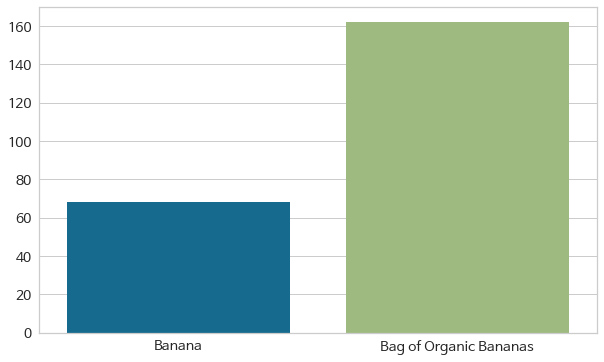

In [ ]:
count_1 = 0
count_2 = 0

for i in range(len(top_items)):
    for j in range(len(top_items[i])):
        if top_items[i][j] in 'Banana':
            count_1 += 1

for i in range(len(top_items)):
    for j in range(len(top_items[i])):
        if top_items[i][j] in 'Bag of Organic Bananas':
            count_2 += 1

print(f'바나나{count_1}개')    
print(f'친환경바나나{count_2}개')    

df_banana = pd.DataFrame([[68,162]], columns=['Banana', 'Bag of Organic Bananas'])
plt.figure(figsize=(10,6))
sns.barplot(data=df_banana)
plt.show()

In [ ]:
te2 = TransactionEncoder()
te_ary2 = te2.fit(top_items).transform(top_items) # fit = 고유한 라벨을 갖게됨 / transform = 원핫인코딩,numpy배열로 전환
ap_data2 = pd.DataFrame(te_ary2,columns=te2.columns_) # 원핫 인코딩 된 데이터프레임으로 변환

In [ ]:
result2 = fpgrowth(ap_data2, min_support=0.01, use_colnames=True).sort_values(by='support',ascending=False)
result_chart2 = association_rules(result2, metric='confidence',  min_threshold=0.5)
# result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)

In [ ]:
association = result_chart2[['antecedents','consequents','antecedent support','confidence','lift']].sort_values(by=['antecedent support','confidence','lift'],ascending=False)
association

,antecedents,consequents,antecedent support,confidence,lift
0,(Organic Lemon),(Bag of Organic Bananas),0.052,0.500000,2.873563
3,"(Bag of Organic Bananas, Organic Strawberries)",(Organic Hass Avocado),0.032,0.500000,5.813953
1,(Organic Cucumber),(Bag of Organic Bananas),0.030,0.533333,3.065134
2,(Honeycrisp Apple),(Banana),0.026,0.615385,4.524887
4,"(Organic Strawberries, Organic Hass Avocado)",(Bag of Organic Bananas),0.026,0.615385,3.536693
9,"(Bag of Organic Bananas, Organic Lemon)",(Organic Hass Avocado),0.026,0.538462,6.261181
8,(Organic Small Bunch Celery),(Organic Yellow Onion),0.024,0.583333,11.666667
7,(Organic Small Bunch Celery),(Organic Hass Avocado),0.024,0.583333,6.782946
11,"(Bag of Organic Bananas, Organic Large Extra F...",(Organic Hass Avocado),0.024,0.583333,6.782946
5,(Organic Fuji Apple),(Banana),0.024,0.583333,4.289216


In [ ]:
# 연관규칙분석 아보카도 개수
count_3 = 0
for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['antecedents'][i]:
        if j == 'Organic Hass Avocado':
            count_3 +=1

for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['consequents'][i]:
        if j == 'Organic Hass Avocado':
            count_3 +=1
count_3

20

In [ ]:
# 연관규칙분석 바나나 개수
count_4 = 0
for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['antecedents'][i]:
        if j == 'Banana':
            count_4 +=1

for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['consequents'][i]:
        if j == 'Banana':
            count_4 +=1
count_4

2

In [ ]:
# 연관규칙분석 오가닉바나나 개수
count_5 = 0
for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['antecedents'][i]:
        if j == 'Bag of Organic Bananas':
            count_5 +=1

for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['consequents'][i]:
        if j == 'Bag of Organic Bananas':
            count_5 +=1
count_5

22

### k-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df_model = df_graph[['누적주문','주문텀']].dropna()
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(df_model)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c28b437c0>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

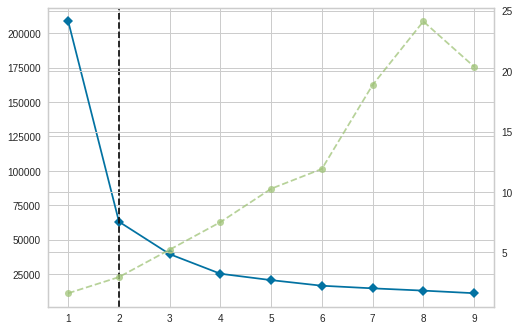

In [ ]:
# Elbow Method
from yellowbrick.cluster import KElbowVisualizer
elbow = KMeans()
elbow_vi = KElbowVisualizer(elbow, k=(1,10))
elbow_vi.fit(sc_data)

# 파란색 : 각 데이터간 군집의 중심과의 평균거리
# 초록색 : 학습시간

In [ ]:
k = 2
model = KMeans(n_clusters=k, random_state=12)
model.fit(sc_data)

KMeans(n_clusters=2, random_state=12)

In [ ]:
df_graph['cluster'] = model.fit_predict(sc_data)

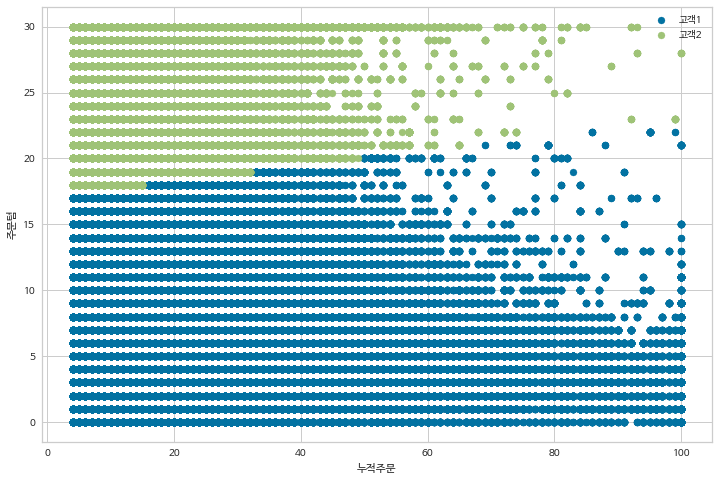

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12,8))
for i in range(k):
    plt.scatter(df_graph.loc[df_graph['cluster']==i, '누적주문'], 
                df_graph.loc[df_graph['cluster']==i, '주문텀'])
plt.xlabel('누적주문')
plt.ylabel('주문텀')
plt.legend(['고객1', '고객2'])
plt.show();

## 5) 평가

## 6) 배포(배포하지않음)